<a href="https://colab.research.google.com/github/minfa496-spec/OBJECT-DETECTION/blob/main/small_toy_scanner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ✅ STEP 1: Install Dependencies
!pip install tensorflow tensorflow_hub opencv-python-headless -q


In [ ]:
# ✅ STEP 2: Upload an Image
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Load and convert image
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


Saving kids room 2.jpg to kids room 2 (1).jpg


In [ ]:
# ✅ STEP 3: Load SSD MobileNet v2 Model from TensorFlow Hub
import tensorflow as tf
import tensorflow_hub as hub

detector = hub.load("https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2")

# Preprocess image
input_tensor = tf.convert_to_tensor(image_rgb, dtype=tf.uint8)
input_tensor = tf.expand_dims(input_tensor, 0)  # Add batch dimension

# Run detection
detections = detector(input_tensor)
result = {key: value.numpy() for key, value in detections.items()}


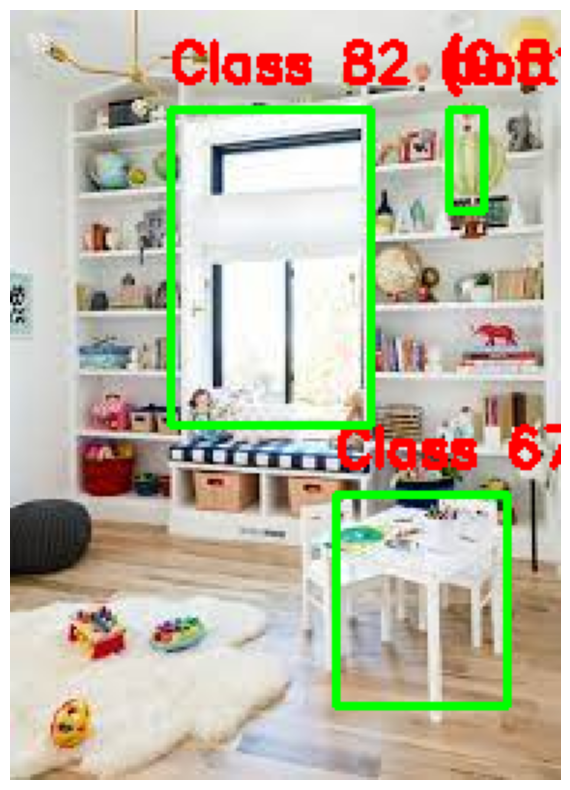

In [ ]:
# ✅ STEP 4: Draw Bounding Boxes on Detected Objects
# COCO Label Map (partial)
labels = {
    1: 'person', 2: 'bicycle', 3: 'car', 18: 'dog',
    44: 'bottle', 47: 'cup', 62: 'chair', 77: 'cell phone', 88: 'teddy bear'
}

image_with_boxes = image_rgb.copy()
height, width, _ = image_with_boxes.shape

for i in range(len(result["detection_scores"][0])): # Iterate through the scores in the first dimension
    score = result["detection_scores"][0][i] # Access the individual score
    if score < 0.5:
        continue  # Skip low confidence
    box = result["detection_boxes"][0][i] # Access the corresponding box
    class_id = int(result["detection_classes"][0][i]) # Access the corresponding class ID
    label = labels.get(class_id, f"Class {class_id}")

    # Convert normalized coordinates to pixel values
    y1, x1, y2, x2 = box
    left, top, right, bottom = int(x1 * width), int(y1 * height), int(x2 * width), int(y2 * height)

    # Draw bounding box and label
    cv2.rectangle(image_with_boxes, (left, top), (right, bottom), (0, 255, 0), 2)
    cv2.putText(image_with_boxes, f'{label} ({score:.2f})', (left, top - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

# Display the image with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(image_with_boxes)
plt.axis('off')
plt.show()

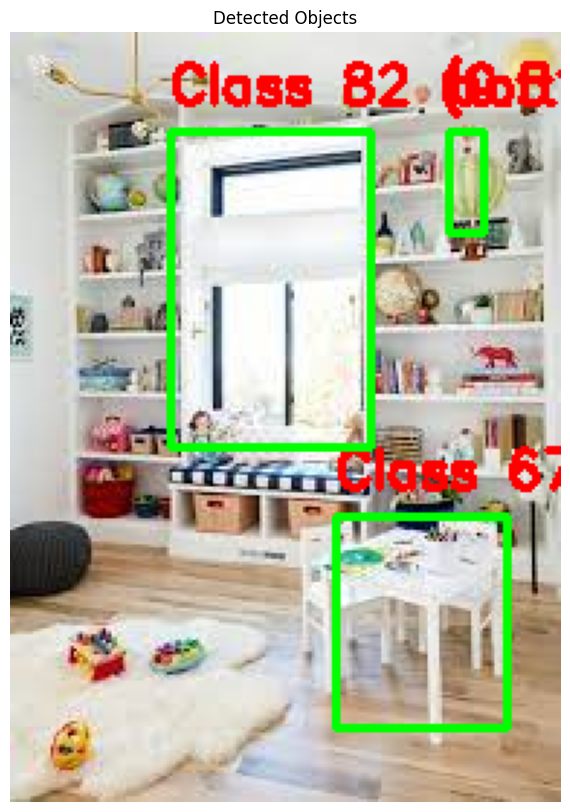

In [ ]:
# ✅ STEP 5: Show Final Image with Detections
plt.figure(figsize=(10, 10))
plt.imshow(image_with_boxes)
plt.axis("off")
plt.title("Detected Objects")
plt.show()
